<a href="https://colab.research.google.com/github/MaricelaMH/SIMULACION-II/blob/main/Cola_un_servidor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## COLA CON UN SERVIDOR

Una cola con un servidor es un concepto clave en la teoría de colas (o teoría de líneas de espera). Este modelo se utiliza para estudiar sistemas donde los "clientes" (que pueden ser personas, trabajos, tareas, etc.) llegan a una "cola" (una fila) y esperan ser atendidos por un "servidor" (o recurso que proporciona un servicio).

Imprementaremos el siguiente pseudocodigo para modelar un sistema de colas simple.

![texto alternativo](https://drive.google.com/uc?id=1yyDLsHHWvC5IFtPc9w2zClXhNDGFHrTE)




# VARIABLES - - INICIALES
1. Primero definimos cada variable para ver el comportamiento que tendran:

* $t = 0$: Tiempo inicial $0$
* $n=0$: Número de clientes en el sistema, inicialmente no hay clientes.
* $N_{LL}$: Número de llegadas hasta el instante $t$
* $N_s=0$: Número de salidas hasta el instante $t$
* $T_p$: Tiempo de permanencia en el sistema
* $T_0$ : Tiempo de llegada de un cliente
* $t_{LL}$: Tiempo de la siguiente llegada (este sera igual al tiempo de llegada inicial generado)
* $t_s$: Tiempo de servicio (si no hay clientes siendo antenidos, el tiempo es infinito)

Por lo que codificamos lo siguiente:



2. Dado que en muchas simulaciones de colas, el número de llegadas y el tiempo entre llegadas de clientes se modela utilizando una distribución exponencial. Esto es especialmente común en la teoría de colas de Poisson, que se usa para describir procesos de llegada de clientes en sistemas de servicio, como bancos, hospitales, y transporte público, por lo que tomaremos el comportamiento de llegadas y el tiempo entre llegadas como una distribución exponencial.


In [19]:
import random
import math
import matplotlib.pyplot as plt

# Función para generar tiempos de llegada aleatorios
def tiempo_llegada():
    return random.expovariate(1.0)  # Con λ=1

# Función para generar tiempos de servicio aleatorios
def tiempo_servicio():
    return random.expovariate(1.0)  # Con λ=1


3. Inicializamos nuestas variables detalladas anteriormente:

In [20]:
# Parámetros iniciales
T = 100  # Tiempo máximo de simulación
t = 0   # Tiempo actual
n = 0   # Número de clientes en el sistema
NLL = 0 # Contador de llegadas
NS = 0  # Contador de servicios completados
Tp = 0  # Tiempo total de permanencia
tLL = tiempo_llegada()  # Tiempo de la primera llegada
tS = math.inf  # Tiempo de servicio (inicialmente infinito)

4. Declaramos dos listas para almacenar nuestros registros sobre los tiempos de llegadas y de servicio

In [21]:
LL = []  # Lista para tiempos de llegadas
S = []   # Lista para tiempos de servicios

5. Indicamos la condición
$$ t_{LL} \leq t_s \text{ y } t_{LL} \leq T$$

Lo anterior determina el momento en el que llega un nuevo cliente al sistema actualizando asi mismo el estado del sistema para representar el hecho de que un cliente ha llegado.

6. Tanto el CASO 1 y el CASO 2 es el proceso y tiempos durante el servicio, por lo que se detalla cada una de ellas, asi veremos que el

* CASO 1: Llegada del cliente
* CASO 2: Servicio complerado


In [22]:
 # Simulación
while tLL <= T or (n > 0 and tS <= T):

    # Caso 1: llegada de cliente
    if tLL <= tS and tLL <= T:
        t = tLL     # Actualiza el tiempo a la llegada del cliente
        NLL += 1    # Contador de llegadas
        n += 1      # Incrementa el numero de clientes en el sistema
        LL.append(t)  # Registrar los tiempos de llegada
        tLL = t + tiempo_llegada()  # Generar el siguiente tiempo de llegada

        # Si es el único cliente en el sistema, generar tiempo de servicio
        if n == 1:
            Y = tiempo_servicio() # Tiempo de atencion para este cliente
            tS = t + Y  # Generar el tiempo en que el servicio terminará

    # Caso 2: servicio completado
    elif tLL > tS and tS <= T:
        t = tS   # Actualizar el tiempo desúes de la ultima salida del cliente
        NS += 1  # Contador de servicios completados
        n -= 1   # Disminuye el numero de clientes en el sistema
        S.append(t)  # Registrar el tiempo de servicio completado

        # Si quedan clientes en el sistema, generar otro tiempo de servicio
        if n > 0:
            Y = tiempo_servicio()
            tS = t + Y
        else:
            tS = math.inf  # No hay más clientes en el sistema

# Caso 3: Procesamos a los clientes después de que T haya pasado
while n > 0:
    t = tS
    NS += 1 # Contador de servicios completados
    n -= 1  # Disminuye el numero de clientes en el sistema
    S.append(t)  # Registrar tiempo de servicio completado
    if n > 0: # Si hay mas clientes en la cola
        Y = tiempo_servicio() # Se vuelve a tomar el timepo de servicio para el cliente
        tS = t + Y # Actualiza en tiempo de finalización
    else:
        tS = math.inf # Si no hay mas clientes, el tiempo se marca como infinito

# Caso 4: Finalizamos simulación y calculamos tiempo total de permanencia
    if tS > T and tLL > T and n == 0:
       Tp = max(0, t - T)  # Calcula el tiempo total de permanencia


7. Asi el CASO 3 procesa a los clientes que estan en el sistema cuando el tiempo máximo de simulación ya ha pasado, y finalmente en el CASO 4 se calcula el tiempo total de permanencia en el sistema, por lo que:
* CASO 3: Procesa a los clientes restantes despues de que paso el tiempo establecido para el servicio
* CASO 4: Finalizamos la simulación


Finalmente podemos mostrar cual fue el timpo y el número de clientes promedio en el sistema, asi:

In [23]:
# Calculamos el número promedio de clientes en el sistema
if NLL > 0:
  tiempo_promedio = Tp / NLL
  print("Tiempo promedio del cliente en el sistema:", round(tiempo_promedio,2))

  # Calculamos el número promedio de clientes en el sistema
  total_clientes_en_sistema = n
  tiempo_total_de_simulacion = t
  for i in range(len(LL)):
    if i < len(S):
      total_clientes_en_sistema += (S[i] - LL[i])
    else:
      total_clientes_en_sistema += (tiempo_total_de_simulacion - LL[i])

  promedio_clientes = total_clientes_en_sistema / tiempo_total_de_simulacion
  print("Número promedio de clientes en el sistema:", round(promedio_clientes,2))
  print("Número total de clientes en el sistema: ",round(total_clientes_en_sistema,2))


Tiempo promedio del cliente en el sistema: 0.01
Número promedio de clientes en el sistema: 3.4
Número total de clientes en el sistema:  344.1


Damos a conocer el tiempo total despues del cierre del sistema

In [24]:
# Calcular el tiempo después del cierre del sistema
tiempo_despues_cierre = Tp
print("Tiempo después del cierre del sistema:", round(tiempo_despues_cierre,2))

Tiempo después del cierre del sistema: 1.22


Veamos el comportamiento del tiempo por cada cliente durante el servicio

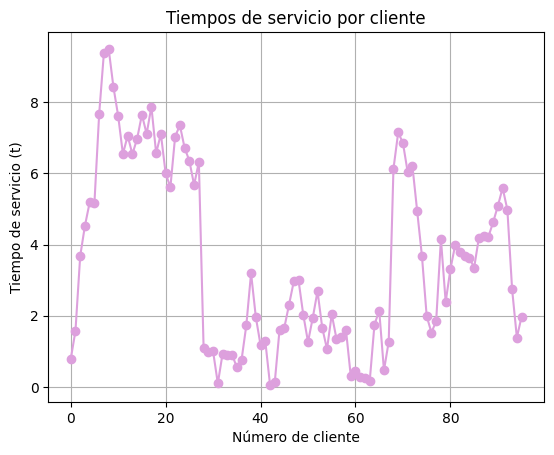

In [25]:
# Calculamos el tiempo después del cierre del sistema
tiempos_servicio = []
for i in range(len(S)):
  if i < len(LL):
    tiempos_servicio.append(S[i] - LL[i])

# Graficamos los tiempos de servicio por cliente
plt.plot(tiempos_servicio, marker='o', linestyle='-', color='#DDA0DD')
plt.xlabel("Número de cliente")
plt.ylabel("Tiempo de servicio (t)")
plt.title("Tiempos de servicio por cliente")
plt.grid(True)
plt.show()